# Analysis client's orders

**Main Target**: Analyze customer order data and look at patterns based on it.

**Analysis Tasks**:
- Explore and preprocess row data
- Find the most popular order platform by client's premium
- See the distribution of data on the charts

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Load data

In [3]:
user_data = pd.read_csv('../../../data/01_module/03_part/3_user_data.csv')
logs = pd.read_csv('../../../data/01_module/03_part/3_logs.csv')

## 2. Check data. Preprocessing

In [10]:
user_data.head(3)

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64


In [12]:
logs.head(3)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894


In [15]:
print(f'Shape (user_data): {user_data.shape}')
print(f'Shape (logs): {logs.shape}')

Shape (user_data): (2954, 3)
Shape (logs): (4500, 4)


In [17]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [25]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [27]:
logs.time = pd.to_datetime(logs.time)

In [23]:
user_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
client,2954.0,NaN,NaN,NaN,50767.886594,28800.505847,40.0,25639.5,51569.5,75963.25,99973.0
premium,2954,2,False,2548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2954.0,NaN,NaN,NaN,44.196005,14.248336,20.0,32.0,44.0,56.0,69.0


In [32]:
logs.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
client,4500.0,NaN,NaN,NaN,50998.758,40.0,27056.5,52659.0,76001.25,99993.0,28374.472495
success,4500,2,True,3289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,4500,3,phone,2753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,4500,NaN,NaN,NaN,1970-01-01 00:00:01.585440414,1970-01-01 00:00:01.585400002,1970-01-01 00:00:01.585420111,1970-01-01 00:00:01.585440386,1970-01-01 00:00:01.585460600,1970-01-01 00:00:01.585479980,NaN


In [33]:
logs.platform.nunique()

3

## 3. Analysis

### Which client has performed the most successful transactions?

In [60]:
top_clients = logs.query('success') \
    .client.value_counts() \
    .head(9) \
    .reset_index() \
    .sort_values(by='client')

ides_client = top_clients.client.to_list()
ides_client

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

### Which platform is the most popular?

In [59]:
top_platform = logs.query('success') \
                    .platform.value_counts() \
                    .idxmax()

top_platform

'phone'

### Which platform is the most popular? (among premium clients)

In [102]:
user_info_df = logs.merge(right=user_data, on='client')

top_platform_by_premium = user_info_df.query('premium') \
    .platform.value_counts() \
    .idxmax()

top_platform_by_premium

'phone'

## 4. Visualization

### Distribution of clients (premium/common) by age

<Figure size 1000x800 with 0 Axes>

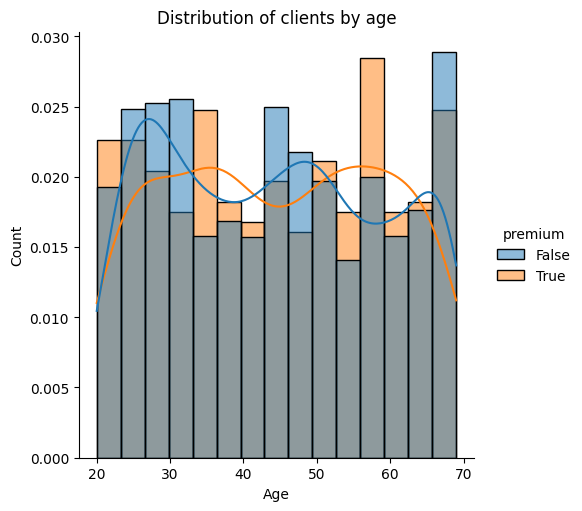

In [132]:
plt.figure(figsize=(10, 8))

ax = sns.displot(
    data=user_info_df,
    x='age',
    hue='premium',
    kde=True,
    stat='density',
    common_norm=False,
    bins=15
)

ax.set(title='Distribution of clients by age', xlabel='Age', ylabel='Count')

plt.show()

### Number of clients by success operations

In [128]:
operations_df = user_info_df.query('success') \
    .groupby('client', as_index=False) \
    .agg({'time': 'count'}) \
    .groupby('time', as_index=False) \
    .agg({'client': 'count'}) \
    .rename(columns={'time': 'operations', 'client': 'clients'}
)

operations_df

,operations,clients
0,1,2051
1,2,42
2,3,1
3,40,1
4,41,9


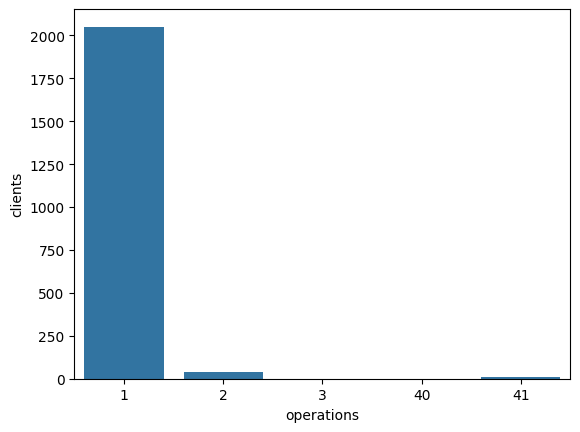

In [131]:
sns.barplot(
    data=operations_df,
    x='operations',
    y='clients'
)

plt.show()

### Distribution of the number of successful operations by age of the client

In [148]:
clients_using_computer_df = user_info_df[
    (user_info_df['success']) & (user_info_df['platform'] == 'computer')
]

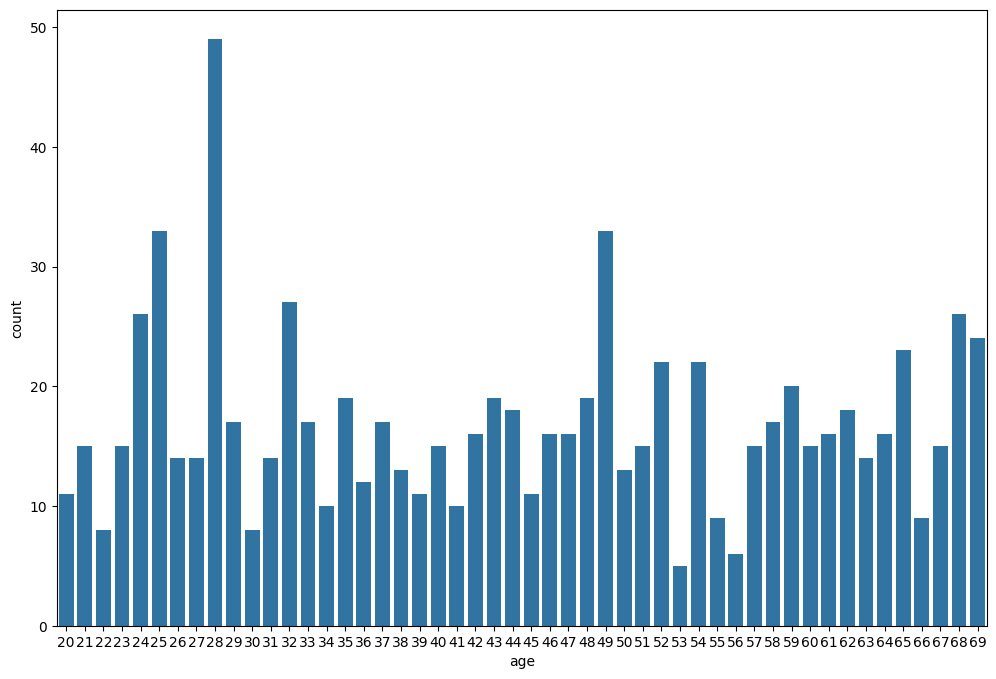

In [152]:
plt.figure(figsize=(12, 8))
sns.countplot(clients_using_computer_df, x='age')
plt.show()